# Section 2. Linear regression

In linear regression, the idea is to select a linear function $f_{\boldsymbol{\theta}}$, whose parameters $\boldsymbol{\theta}$ are identified to fit data by means of the minimization of some error metric between the predictions, i.e., the outputs of the function, and the data. As we will see, linear regression can be formulated as a simple solution of a linear system.

To fix the ideas, let us start by considering a _training_ data set, with $n$ data points or _snapshots_, composed of $p$ dependent variables $\mathbf{Y}$ and $m$ independent variables $\mathbf{X}$ 

$
\mathbf{Y} \equiv
\begin{bmatrix}
\mid & \mid & \mid & \mid\\
\mathbf{y}^{(1)} & \mathbf{y}^{(2)} & \cdots & \mathbf{y}^{(n)}\\
\mid & \mid & \mid & \mid
\end{bmatrix}, 
\qquad 
\mathbf{X} \equiv
\begin{bmatrix}
\mid & \mid & \mid & \mid\\
\mathbf{x}^{(1)} & \mathbf{x}^{(2)} & \cdots & \mathbf{x}^{(n)}\\
\mid& \mid & \mid & \mid
\end{bmatrix},
$

where $\mathbf{y}^{(k)}$ and $\mathbf{x}^{(k)}$ are the vector collecting the $p$ dependent variables and the $m$ independent variables, respectively, at the $k$-th snapshot of the data set.
In the following, we will consider for simplicity one-dimensional dependent variables, i.e., $p=1$, and we will refer to the vector collecting the snapshots as $\mathbf{y}$. However the entire framework developed herein can be easily formulated in higher dimensions.


To find a best fit line through the training data points, we further assume a linear model -- this is why we call it linear regression --

$
\hat{y} = \theta_0+\theta_1 x_1+\theta_2 x_2+ \cdots + \theta_m x_m ,
$

where $\hat{y}$ is the value predicted by the model, $x_k$ is the $k$-th independent variable value, and $\theta_k$ is the $k$-th model parameter -- including the _bias_ term, $\theta_0$, and the model's _weights_, $\theta_1, \theta_2, \cdots, \theta_m$. The above equation can be formulated more concisely as

$
\hat{y} = f_{\boldsymbol{\theta}}\left(\mathbf{x}\right)\equiv \boldsymbol{\theta}^{\text{T}} \mathbf{x}^*,
$

where $\boldsymbol{\theta}=\begin{bmatrix}\theta_0, \theta_1, \theta_2, \cdots, \theta_m\end{bmatrix}^\text{T}$ is the vector collecting the model's parameters, $\mathbf{x}^*=\begin{bmatrix} x_0, x_1, x_2, \cdots, x_m\end{bmatrix}^\text{T}$ is the augmented feature vector with $x_0=1$, $f_{\bm{\theta}}\left(\cdot \right)$ is the \textit{hypothesis function} -- a linear function, in this case --, and the superscript $\text{T}$ denotes the transpose operator. To simplify notation, we will just write interchangeably $\mathbf{x}$ for both $\mathbf{x}$ and $\mathbf{x}^*$.

The next step is to identify the parameters $\boldsymbol{\theta}$ such that the linear regression model, $f_{\boldsymbol{\theta}}\left(\mathbf{x}\right)$, best fits the data set $\left(\mathbf{X}, \mathbf{y}\right)$. This operation is called _training_. Training identifies the parameters value that optimize a measure of the _goodness-of-fit_, i.e., how well (or poorly) a model fits the data.

Various objective functions, often referred to as loss functions, can be adopted and their choice strongly determines the subsequent model. Three standard error metrics of hypothesis $f_{\boldsymbol{\theta}}$ on a set $\mathbf{X}$ are often considered which are associated with the $\ell_1$ and $\ell_2$ norms, respectively defined as the mean absolute error (MAE) and the root mean square error (RMSE):

$
E_{1}\left(\mathbf{X},f_{\boldsymbol{\theta}} \right)  \equiv \dfrac{1}{n} \sum_{k=1}^{n}\left| f_{\boldsymbol{\theta}}(\mathbf{x}^{(k)}) - y^{(k)}\right|$

$E_{2}\left(\mathbf{X},f_{\boldsymbol{\theta}} \right)  \equiv \left(\hspace{-0.05cm}\dfrac{1}{n} \sum_{k=1}^{n}\left( \hspace{-0.05cm}f_{\boldsymbol{\theta}}(\mathbf{x}^{(k)}) - y^{(k)}\hspace{-0.05cm}\right)^{\hspace{-0.05cm}2}\hspace{-0.05cm}\right)^{1/2}. 
$


One can also broadly define the error based on the $\ell_r$ norm, and namely

$
E_{r}\left(\mathbf{X},f_{\boldsymbol{\theta}} \right)  \equiv \left(\dfrac{1}{n} \sum_{k=1}^{n}\left| f_{\boldsymbol{\theta}}(\mathbf{x}^{(k)}) - y^{(k)}\right|^r\right)^{1/r}.
$

The higher the norm index $r$, the more the error metrics focuses on large values and neglect small ones, thus the best fit model intrinsically depends on $r$. In most cases, the differences between models based on different norms are small. However, when there are outliers\footnote{An outlier is an observation that lies an abnormal distance from the other values present in a data set.} in the data, the choice of norm can have a significant impact: for instance, the RMSE is more sensitive to outliers than the MAE.
In linear regression, the most common choice is the root mean square error, but in practice, it is simpler to minimize the mean squared error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root). The MSE of a linear regression hypothesis $f_{\boldsymbol{\theta}}$ on a set $\mathbf{X}$ is calculated as 

$
\text{MSE}\left(\mathbf{X},f_{\boldsymbol{\theta}} \right)  \equiv E_{2}^2\left(\mathbf{X},f_{\boldsymbol{\theta}} \right)  = \dfrac{1}{n} \sum_{k=1}^{n}\left( \boldsymbol{\theta}^{\text{T}}\mathbf{x}^{(k)} - y^{(k)}\right)^2.
$

Once the loss function is defined, MSE in our case, training requires to find the parameters $\boldsymbol{\theta}$ that minimize that particular loss. This requires differentiation with respect to $\boldsymbol{\theta}$ to identify the value of the latter such that a minimum of the error occurs -- that is, find those $\boldsymbol{\theta}$ for which $\partial \text{MSE}\left(\mathbf{X},f_{\boldsymbol{\theta}} \right) /\partial \boldsymbol{\theta} = 0$.

Note that, although a zero derivative denotes either a minimum or a maximum, we know this must be a minimum of the error since there is no maximum error, i.e., we can always find a model that has a larger error.

Following the above procedure, the values of the parameters for which the error is minimum, $\hat{\boldsymbol{\theta}}$, are the solution of the following linear system of equations

$
\mathbf{X}^{\text{T}}\mathbf{X}\hat{\boldsymbol{\theta}}^{\text{T}} = \mathbf{X}^{\text{T}}\mathbf{y}.
$

If the matrix $\mathbf{X}^{\text{T}}\mathbf{X}$ is square and invertible (i.e., it has nonzero determinant), then there exists a unique solution $\hat{\boldsymbol{\theta}}$ which is given by the \textit{normal equation},

$
\hat{\boldsymbol{\theta}}^{\text{T}} = \left(\mathbf{X}^{\text{T}}\mathbf{X}\right)^{-1} \mathbf{X}^{\text{T}}\mathbf{y}.
$


However, when $\mathbf{X}^{\text{T}}\mathbf{X}$ is singular, the normal equation does not hold. An alternative way to solve the above equation consists of using the Moose-Penrose pseudoinverse $\mathbf{X}^{+}$ of $\mathbf{X}$ to obtain the general and unique solution

$
\hat{\boldsymbol{\theta}} = \mathbf{X}^{+} \mathbf{y},
$

where we have used the commutative property $\left(\mathbf{X}^{\hspace{-0.025cm}+}\right)^{\text{T}} = \left(\mathbf{X}^{\text{T}}\right)^{\hspace{-0.025cm}+}$.

The pseudoinverse is computed using the matrix factorization technique called singular value decomposition that can decompose the independent variables matrix $\mathbf{X}$ into the multiplication of three matrices $\mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^{\text{T}}$. The pseudoinverse is computed as $\mathbf{X}^+ = \mathbf{V}\boldsymbol{\Sigma}^{\hspace{-0.025cm}+}\mathbf{ U }^{\text{T}}$. To compute the matrix $\boldsymbol{\Sigma}^{\hspace{-0.025cm}+}$, the algorithm takes $\boldsymbol{\Sigma}$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix.

With all the ingredients in our hands, is time to move to a concrete example.

## Example

Let consider fitting the following data set generated by the function

\begin{equation}
y = \alpha_2 \exp \left(\alpha_1 x +\mathcal{U}\left(-1,1\right)\right), \quad \alpha_1= 1, \; \alpha_2 = e,
\label{eq:ex1a}
\end{equation}

which is obviously nonlinear. $\mathcal{U}\left(-1,1\right)$ is a uniformly distributed random variable that lies between $-1$ and $1$. The snippet hereinafter generates our data set:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

n_snapshots = 200 # set number of snapshots: n
a_1 = 1.; a_2 = np.exp(1) # set coefficients
noise = np.random.uniform(-1,1,(n_snapshots,1)) # generate Gaussian noise
X = np.random.uniform(0,4.,(n_snapshots,1)) # generate independent variable X
y = a_2*np.exp(a_1*X+noise) # compute dependent variable y

At this point, we can use the normal equation and compute the values $\hat{\boldsymbol{\theta}}$, using NumPy’s linear algebra module (np.linalg) to calculate the inverse of a matrix and the dot() method for matrix multiplication:

In [2]:
X_p = np.c_[np.ones((n_snapshots, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_p.T.dot(X_p)).dot(X_p.T).dot(y)
print(theta_best) # parameters

[[-16.93873601]
 [ 28.05702557]]


The normal equation gives a linear model of the form $\hat{y}\approx-16.9+28.0x$. 

At this point, we can check if our linear model correctly fit the training data set, making predictions as follows

In [3]:
X_new = np.array([[0],[4]])
X_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_b.dot(theta_best)

Finally, we can plot the predictions (y_predict) with the training data set, see Figure below.
As one could have imagined from the very beginning, our regression model poorly fits the nonlinear data set.

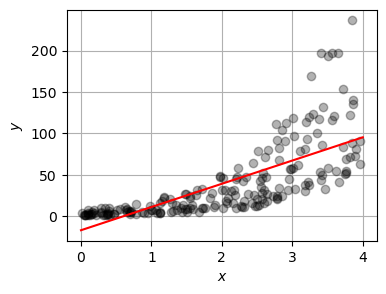

In [4]:
fig = plt.figure(figsize=(4, 3))
plt.plot(X, y,'ko',alpha=0.3)
plt.plot(X_new, y_predict,'r-')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.grid()

But, as in most cases, data set preparation and transformation may help us to improve predictions. In this particular case, one has to simply perform a change of coordinates, defining $
y' = \ln(y)$ and $\alpha_2' = \ln(\alpha_2)$. Such a transformation (\textit{magically}) performs the linearization of the original data set, which now becomes

\begin{equation}
y' = \alpha_2' + \alpha_1 x + \mathcal{U}\left(-1,1\right), \quad \alpha_1=1, \; \alpha_2'=1,
\label{eq:ex1b}
\end{equation}

Let's try to apply the following changes to our original data set, repeating the linear regression fit, and plotting the predictions:

In [5]:
y_prime = np.log(y) # change of coordinate, y' = ln(y)
X_b = np.c_[np.ones((n_snapshots, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_prime)
X_new = np.array([[0],[4]])
X_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_b.dot(theta_best) # parameters
print(theta_best)

[[0.99530983]
 [0.98646971]]


Done! The linear regression now correctly fits the transformed data set, identifying the following model: $y' = 0.98+ 0.99 x$. Note that the presence of noise renders impossible to retrieve the exact values of the intercept and the angular coefficient.

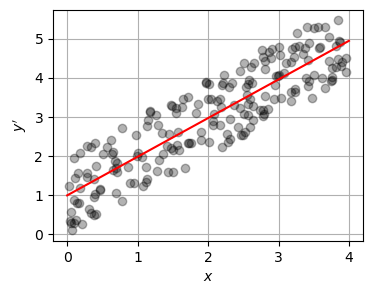

In [6]:
fig = plt.figure(figsize=(4, 3))
plt.plot(X, y_prime,'ko',alpha=0.3)
plt.plot(X_new, y_predict,'r-')
plt.ylabel("$y'$")
plt.xlabel('$x$')
plt.grid()

Alternatively, a simpler (and more concise) way to perform a linear regression fit is to directly compute the pseudoinverse of the independent variable matrix $\mathbf{X}$. This can be done, in few lines of code, using Scikit-Learn's library:

In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
regr = linear_model.LinearRegression() # create linear regression object
regr.fit(X, y_prime) # train the model
y_predict = regr.predict(X) # make predictions
print("Parameters: ", regr.intercept_,regr.coef_) # parameters
print("Mean squared error: %.4f" % mean_squared_error(y_prime,y_predict)) # compute MSE

Parameters:  [0.99530983] [[0.98646971]]
Mean squared error: 0.3459


# Section 3. Gradient descent

We have seen that linear regression allow us to fit data sets with pre-identified linear models or hypothesis $f_{\boldsymbol{\theta}}$. The advantages are (i) the admission of analytically tractable, best-fit solutions and (ii) the reduced computational complexity. However, the major drawback is the impossibility to fit nonlinear functions, much more abundant in nature than linear ones.

To this end, the general theory of nonlinear regression considers a nonlinear hypothesis function $f_{\boldsymbol{\theta}}\left(\mathbf{x} \right)$. In this case, if we proceed as we have done for linear regression -- that is, requiring that $\partial \text{MSE}\left(\mathbf{X},f_{\boldsymbol{\theta}} \right) /\partial \boldsymbol{\theta} = 0$ -- we obtain the following nonlinear system of equations

\begin{equation}
\dfrac{1}{n}\sum_{k=1}^n
\left( f_{\boldsymbol{\theta}}(\mathbf{x}^{(k)})-y^{(k)}\right) \dfrac{\partial f_{\boldsymbol{\theta}}}{\partial \boldsymbol{\theta}}=0.
\label{eq:nonlinear}
\end{equation}

Unfortunately, there are no analytical methods to solve such a nonlinear system for a general nonlinear hypothesis $f_{\boldsymbol{\theta}}$. And sometimes the equation above may even not admit a solution or admit an infinity of solutions.

In such scenarios, the idea to solve the aforementioned nonlinear system is to resort to iterative approaches which, depending on the good (or bad) initial guess, may converge to the global (or a local) minimum error.

One of the most effective approaches to identify the roots of a nonlinear system of equations is *gradient descent*. Gradient descent (GD), also called steepest descent, is an optimization algorithm for finding a local minimum of a differentiable function -- that is, a set of optimal parameters $\boldsymbol{\theta}$ that minimizes a given (differentiable) loss function.

A quite easy way to grasp the essence of gradient descent is to imagine yourself lost in a foggy mountain, where visibility is so limited that you can only sense the slope beneath your feet. To find your way out quickly, a smart approach would be to head downhill, following the steepest slope (*WARNING, do not try this neither at home nor in Aussois!*). This is exactly what gradient descent does: it measures the local gradient of the loss function with regard to the parameters $\boldsymbol{\theta}$ and tweaks the latter to go in the direction of descending gradient. Once the gradient is zero, we have reached the minimum.

Let's break it down further. At the beginning, $\boldsymbol{\theta}$ is filled with random values, or with other predefined values. This process is called *initialization*. Then, in small incremental steps, often called *epochs*, the algorithm tweaks repeatedly the parameters to minimize the value of the loss function $E\left(\boldsymbol{\theta},f_{\boldsymbol{\theta}} \right)$ (that must be differentiable for all $\boldsymbol{\theta}$ -- which also implies that $f_{\bm{\theta}}$ must be differentiable for every $\boldsymbol{\theta}$) according to the regular gradient descent optimizer equation

\begin{equation}
    \boldsymbol{\theta}^{\text{ next step}} = \boldsymbol{\theta}-\eta \dfrac{\partial E}{\partial \boldsymbol{\theta}} \left(\boldsymbol{\theta},f_{\boldsymbol{\theta}} \right),
    \label{eq:gradient_descent}
\end{equation}

where $\eta$ is the *learning rate*. In other words, we need to compute how much the loss function $E$ will change if we change $\theta_i$ just a little bit, with $i=1,2, \cdots, m$.

By resorting to the analogy of the foggy mountain, it is like asking *What is the slope of the mountain under my feet if I face east?"* and then asking the same question facing north (and so on for all other dimensions $i$ up to $m$, if you can imagine a universe with more than three dimensions).

After having computed the gradient vector $\partial E / \partial \boldsymbol{\theta}$ which points uphill, we just have to head in the opposite direction to go downhill - that is, subtracting the gradient from the parameters $\boldsymbol{\theta}$, with a weighting factor $\eta$.
This process continues until the algorithm converges, reaching a (global or local) minimum value.



When optimizing an objective function using GD, two important aspects must be considered:

- The size of the incremental steps, which is determined by the **learning rate**, $\eta$. The latter is a *hyperparameter*. A hyperparameter is a variable controlling the learning process (in contrast to the model parameters that are determined via training). The learning rate, as such, is crucial in identifying the best value of the parameters $\boldsymbol{\theta}$ within the smallest number of iterations.  Indeed, if $\eta$ is set too small, the algorithm will require numerous iterations to converge, resulting in time-consuming computations. Conversely, if $\eta$ is excessively high, we might overshoot the minimum and end up on the opposite side, potentially at a point where the error is higher than before. This scenario could even cause the algorithm to diverge, producing increasingly larger error values and failing to find an optimal solution.

- The **loss function**. Not all loss functions exhibit a smooth, bowl-like shape. Depending on the choice of loss function and/or the hypothesis function, we may find irregularities such as holes, ridges, plateaus, and many local minima, creating challenges for convergence towards the (global) minimum. Also remember that the loss function must always be differentiable\footnote{In reality, when dealing with a loss function that is not everywhere differentiable, an ad-hoc subgradient procedure can be used: instead of calculating the gradient, we use a subgradient that provides a valid lower bound on the slope of the loss function at that particular singular point.}, otherwise, we cannot compute the optimizer equation.  Some of the primary obstacles that we may encounter with some loss functions and, in most cases, for nonlinear hypotheses $f_{\boldsymbol{\theta}}$ - but also in neural networks. When the algorithm starts on the left due to random initialization, it attempts to converge to a local minimum, which may not be as desirable as the global minimum. This same local minimum is a point of discontinuity that renders even more difficult the convergence. On the other hand, if the algorithm begins on the right, it finds a plateau, and crossing it takes an extensive amount of time, and if we prematurely stop the algorithm, we won't succeed in reaching the global minimum.


The MSE for linear regression models happens to be always differentiable and convex: great news! This means that any two points on the curve can be connected by a line segment that never intersects the curve. Consequently, there are no local minima, only one single global minimum. Moreover, the MSE function is continuous, exhibiting a slope that changes gradually (differently from the MAE). These characteristics have a significant implication: given sufficient time and an appropriate value of the learning rate, gradient descent is guaranteed to approach the global minimum closely.

In linear regression, the shape of the MSE loss function always resembles a bowl. However, we should note that the latter can be elongated if the parameters - that is, the features - have different scales. Note that, in general, when features have quite different scales, the convergence to the global minimum requires a large number of iterations. Such a drawback can be easily overcome by appropriately scaling the features - that is, by scaling the independent and dependent variables.

It's worth noting that training a model, whether linear or nonlinear, involves searching for a perfect combination of model parameters that minimizes the loss function across the entire data set. This search takes place within the vast parameter space of the model. Now, imagine we are trying to train a model with an extensive set of parameters. In this scenario, we are essentially following the same steps as before, but now in a higher-dimensional space. The dimension of this space is equal to the number of parameters, making the search much more challenging. Picture this: finding a needle in a haystack that has 1000 dimensions is significantly more intricate than doing so in just two dimensions. Thankfully, in the case of linear regression (unlike artificial neural networks), the loss function has optimal properties and the needle (global minimum) resides comfortably at the bottom.


## Batch gradient descent

Batch gradient descent is the most cumbersome implementation of the GD algorithm. It involves the use of the optimizer equation for the full training set $\mathbf{X}$ at every step - that is, the whole batch of training data (and this is the reason of its name).

Applying batch GD for a linear regression problem starts with the computation of the partial derivative of the MSE function with respect to the model's parameter,

\begin{equation}
    \dfrac{\partial}{\partial \boldsymbol{\theta}}\text{MSE}\left(\mathbf{X},f_{\boldsymbol{\theta}} \right) = 
\dfrac{2}{n} \mathbf{X}^{\text{T}} \left( \mathbf{X}\boldsymbol{\theta} - \mathbf{y}\right),
\end{equation}

and continues with using recursively the optimizer equation to update the model's parameters. The recursion stops whether we reach the prescribed number of steps (epochs) or the error is smaller than set threshold.

We can now use the training data set from the previous example and use batch GD to perform a linear regression:

In [8]:
eta = 0.05 # learning rate
n_epochs = 500 # no epochs
theta = np.array([[0.],[0.]]) # initialization
line = X_b.dot(theta)
hist = theta
for epoch in range(n_epochs):
    gradients = 2/n_snapshots * X_p.T.dot(X_p.dot(theta) - y_prime) # Eq. (15)
    theta = theta - eta * gradients # optimizer Eq. (14)
    hist = np.concatenate((hist,theta),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
print(theta)

[[0.99530187]
 [0.98647279]]


It should come as no surprise that we obtain the same result as using the normal equation.

In the two Figures below, we visualize:
- the predictions of the same linear model within the first $10$ iterations using different learning rates, all starting from the same initial point (represented by the dotted line). 
- the evolution of the model parameters,  $\theta_1$ and $\theta_2$, with the contours representing the loss function (MSE) that has a global minimum approximately located at $(1, 1)$.

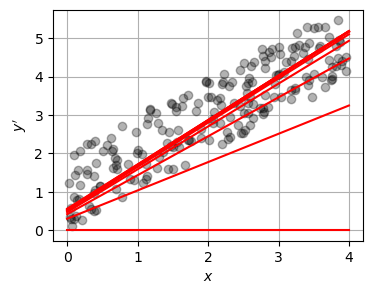

In [9]:
k=10
fig = plt.figure(figsize=(4, 3))
plt.plot(X, y_prime,'ko',alpha=0.3)
plt.plot(X_new, line[:,:k], 'r-')
plt.ylabel("$y'$")
plt.xlabel('$x$')
plt.grid()

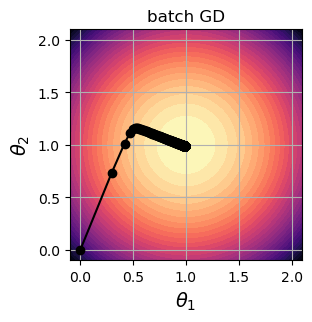

In [10]:
# Plot loss function (MSE)
x = np.linspace(-0.1,2.1,1000)
y = np.linspace(-0.1,2.1)
a,b = np.meshgrid(x,y)
z = (a-1)**2+(b-1)**2

fig = plt.figure(figsize=(3, 3))
cmap = matplotlib.cm.get_cmap('magma_r')
plt.plot(hist[0,:],hist[1,:],'ko-')
plt.contourf(a, b, z, 30, cmap=cmap)
plt.ylabel("$\\theta_2$",fontsize="14")
plt.xlabel("$\\theta_1$",fontsize="14")
plt.grid()
plt.ylim(-0.1,2.1)
plt.xlim(-0.1,2.1)
plt.title('batch GD')
plt.show()

Despite being much faster than using the normal equation or SVD decomposition for high-dimensional linear regression tasks, batch GD is the most computationally demanding among all gradient descent variants and the most vulnerable to *bad* initialization.

The evaluation of the optimizer equation is often computationally intractable, especially for deep neural networks. This is primarily due to two reasons: (i) the parameter vector, collecting the parameters $\theta_k$, can be quite large, and (ii) the number of data points n can also be large. Thus, utilizing the entire training set for computing the gradient can hinder convergence speed. As a result, we will explore two alternative algorithms that can enhance convergence speed to the minimum of the loss function: **stochastic gradient descent** and **mini-batch gradient descent**.

## Stochastic gradient descent

Stochastic gradient descent is a variant of gradient descent that differs from batch gradient descent in how it estimates the gradient in the optimizer equation. Instead of using all $n$ training data points, stochastic GD randomly selects a single datum from the training set to estimate the gradient at each iteration. This choice of a single datum makes stochastic GD faster, as it only needs to process a single instance at a time. As a result, it is advantageous when dealing with large data sets, as it allows for efficient memory allocation.

However, due to its stochastic nature, stochastic GD exhibits less smooth behavior compared to batch GD. Instead of smoothly decreasing towards the minimum, the loss function experiences fluctuations, with only an average error decrease over iterations. Consequently, when the algorithm stops, the final parameter values are generally good but not necessarily optimal. Yet, it is worth noting that the randomness inherent in stochastic GD can actually aid in escaping eventual local minima, increasing the chances of finding the global minimum compared to batch GD.

Hereinafter, we implement the stochastic GD 

In [11]:
eta = 0.05 #learning rate
n_epochs = 20 # no epochs
theta = np.array([[0],[0.]]) #initialization
line = X_b.dot(theta)
hist = theta
for epoch in range(n_epochs):
    for i in range(n_snapshots): # iterate over each snapshot
        random_index = np.random.randint(n_snapshots) # pick random snapshot
        xi = X_p[random_index:random_index+1]
        yi = y_prime[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # Eq. (15)
        theta = theta - eta * gradients # Eq. (14)
    hist = np.concatenate((hist,theta),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
print(theta)

[[0.83905266]
 [1.15041967]]


In the two Figures below,we can observe that the algorithm struggles in converging to the global minimum, rather bouncing all around. This is to the significant dependence of stochastic GD on the learning rate, which in turn is due to inherent stochastic nature of the former.

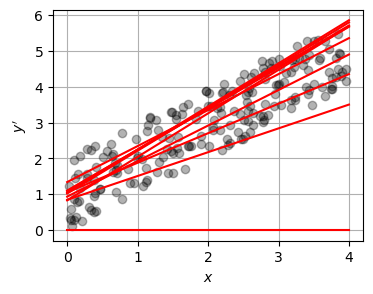

In [12]:
fig = plt.figure(figsize=(4, 3))
plt.plot(X, y_prime,'ko',alpha=0.3)
plt.plot(X_new, line[:,:k], 'r-')
plt.ylabel("$y'$")
plt.xlabel('$x$')
plt.grid()

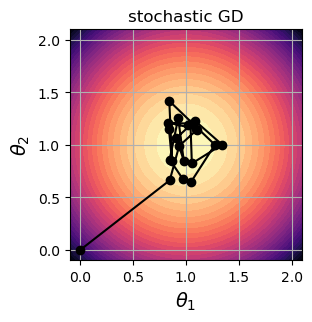

In [13]:
fig = plt.figure(figsize=(3, 3))
cmap = matplotlib.cm.get_cmap('magma_r')
plt.plot(hist[0,:],hist[1,:],'ko-')
plt.contourf(a, b, z, 30, cmap=cmap)
plt.ylabel("$\\theta_2$",fontsize="14")
plt.xlabel("$\\theta_1$",fontsize="14")
plt.grid()
plt.ylim(-0.1,2.1)
plt.xlim(-0.1,2.1)
plt.title('stochastic GD')
plt.show()

The problem can be alleviated by gradually adapting the learning rate while training.

Below, we repeat the learning process using a rather simple learning schedule that linearly decrease the learning rate at each epoch.

In [14]:
theta = np.array([[0],[0.]]) #initialization
t0, t1 = 1, 100 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
line = X_b.dot(theta)
hist = theta
for epoch in range(n_epochs):
    for i in range(n_snapshots):
        random_index = np.random.randint(n_snapshots)
        xi = X_p[random_index:random_index+1]
        yi = y_prime[random_index:random_index+1]
        eta = learning_schedule(epoch * n_snapshots + i) # schedule
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
    hist = np.concatenate((hist,theta),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
print(theta)

[[0.90607535]
 [1.02276101]]


Super effective!

In 20 iterations only, the algorithm converges -- relatively close -- to the global minimum. And this should be compared with the 500 iterations that were needed for the batch GD to reach the minimum.

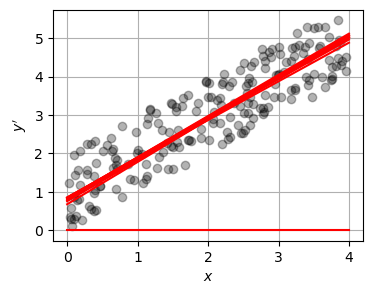

In [15]:
fig = plt.figure(figsize=(4, 3))
plt.plot(X, y_prime,'ko',alpha=0.3)
plt.plot(X_new, line[:,:k], 'r-')
plt.ylabel("$y'$")
plt.xlabel('$x$')
plt.grid()

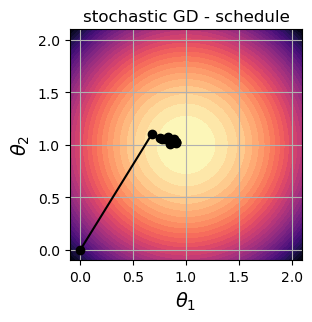

In [16]:
fig = plt.figure(figsize=(3, 3))
cmap = matplotlib.cm.get_cmap('magma_r')
plt.plot(hist[0,:],hist[1,:],'ko-')
plt.contourf(a, b, z, 30, cmap=cmap)
plt.ylabel("$\\theta_2$",fontsize="14")
plt.xlabel("$\\theta_1$",fontsize="14")
plt.grid()
plt.ylim(-0.1,2.1)
plt.xlim(-0.1,2.1)
plt.title('stochastic GD - schedule')
plt.show()

## Mini-batch gradient descent

Once we have a grasp both batch and stochastic GD, understanding mini-batch GD becomes straightforward if we get inspiration from Aristotle's (Latin) quote: *In medio stat virtus* - that is, *the best option lies between two extremes*.

Instead of computing gradients based on the entire training set (batch GD) or a single data point (stochastic GD), mini-batch GD computes gradients on small random sets of data points known as *mini-batches*. This approach offers the advantage of leveraging optimized matrix operations, resulting in improved performance compared to stochastic GD. At the same time, it avoids the need for large memory allocation required by batch GD.

The optimization path followed by mini-batch GD is less erratic than its stochastic counterpart, often leading to a more optimal minimum.

Implementing mini-batch GD is relatively simple. We only need to make slight modifications to the stochastic GD algorithm and provide an iterator (iterate_minibatches) to extract mini-batches.

In [17]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    '''Function to iterate over mini-batches
    :param inputs: independent variable
    :type inputs:  numpy array
    :param targets: dependent variable
    :type targets:  numpy array
    :param batchsize: mini-batch size
    :type batchsize:  integer
    :param shuffle: shuffle mini-batches
    :type shuffle:  bool

    :return: mini-batches of inputs and targets
    :rtype: list of numpy arrays
    '''
    # Check if number of samples in inputs and targets are equal
    assert inputs.shape[0] == targets.shape[0]  
    
    if shuffle:
        indices = np.arange(inputs.shape[0])  # Generate array of indices
        np.random.shuffle(indices)  # Shuffle the indices

    # Iterate over mini-batches
    for start_idx in range(0, inputs.shape[0] - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]  # subset of shuffled indices
        else:
            excerpt = slice(start_idx, start_idx + batchsize)  # slice to select samples

        yield inputs[excerpt], targets[excerpt]  # Return mini-batches as a generator object
        
eta = 0.05 #learning rate
theta = np.array([[0],[0.]]) #initialization
batch_size = 30 # define mini-batches size
line = X_b.dot(theta)
hist = theta
for epoch in range(n_epochs):
    for batch in iterate_minibatches(X_p, y_prime, batch_size, shuffle=True):
        x_batch, y_batch = batch
        gradients = 2/batch_size * x_batch.T.dot(x_batch.dot(theta) - y_batch)
        theta = theta - eta * gradients   
        
    hist = np.concatenate((hist,theta),1)
    line = np.concatenate((line, X_b.dot(theta)),1)
print(theta)

[[0.94862053]
 [0.96679924]]


Done: much faster and accurate than the stochastic GD!

The Figures below depict the predictions of our model within the first 10 iterations of the algorithm and the parameters evolution. Note that the value of the minimum reached by the mini-batch GD intrinsically depends on the selected size of the mini-batch. The latter represents yet another important hyperparameter of our optimization problem.

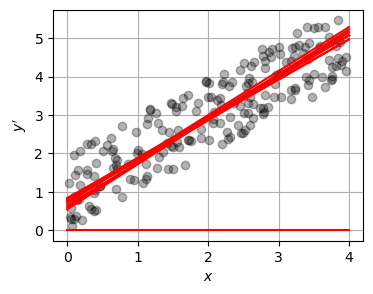

In [18]:
fig = plt.figure(figsize=(4, 3))
plt.plot(X, y_prime,'ko',alpha=0.3)
plt.plot(X_new, line[:,:k], 'r-')
plt.ylabel("$y'$")
plt.xlabel('$x$')
plt.grid()

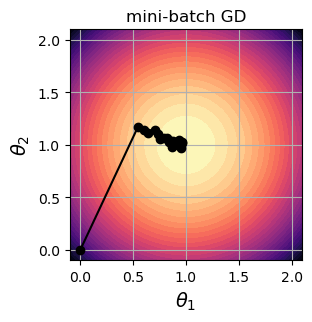

In [19]:
fig = plt.figure(figsize=(3, 3))
cmap = matplotlib.cm.get_cmap('magma_r')
plt.plot(hist[0,:],hist[1,:],'ko-')
plt.contourf(a, b, z, 30, cmap=cmap)
plt.ylabel("$\\theta_2$",fontsize="14")
plt.xlabel("$\\theta_1$",fontsize="14")
plt.grid()
plt.ylim(-0.1,2.1)
plt.xlim(-0.1,2.1)
plt.title('mini-batch GD')
plt.show()

To perform the same task, we could also use Scikit-Learn, and namely the SGDRegressor class, which by default minimizes the MSE.

The following code runs for maximum 20 epochs or until the loss drops by less than 0.001 during one epoch (max_iter=20, tol=1e-3). It starts with a learning rate equal to $\eta$ and use the following learning schedule: $\eta^{(\text{next step})} = \eta  t^{-1/4}$.

The option penalty=None avoids the use of regularization strategies.

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=20, tol=1e-3, penalty=None, eta0=eta)
for epoch in range(n_epochs):
    for batch in iterate_minibatches(X_p, y_prime, batch_size, shuffle=True):
        x_batch, y_batch = batch
        sgd_reg.partial_fit(X, y_prime.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[1.00172812] [1.00508048]
